In [1]:
# importações necessarias
 
# fundamentais
import pandas as pd                                      # manipulação de dados
import numpy as np                                       # calculos matematicos
import seaborn as sns                                    # visualização grafica
import matplotlib.pyplot as plt                          # visualização grafica

# preprocessing
from sklearn.compose import ColumnTransformer            # manipulação de colunas
from sklearn.preprocessing import LabelEncoder           # processamento de variaveis
from sklearn.preprocessing import OneHotEncoder          # processamento de variaveis
from sklearn.preprocessing import MinMaxScaler           # padronização de variaveis
from sklearn.feature_selection import VarianceThreshold  # threshold da variancia
from sklearn.model_selection import train_test_split     # divisao treino/teste dados

# algoritmos
from sklearn.ensemble import RandomForestClassifier      # algoritmo RandomForest
from sklearn.ensemble import ExtraTreesClassifier        # modelo de classificação 

# metricas
from sklearn.metrics import accuracy_score               # avaliação do modelo
from sklearn.metrics import confusion_matrix             # avalicação do modelo
from sklearn.metrics import classification_report        # report modelo

In [2]:
# carregando base de dados

base_census = pd.read_csv('./data/census.csv')

In [3]:
# primeiros registros

base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# seleção de toda as colunas de previsão

colunas = base_census.columns[: -1]
colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [5]:
# seleção e transfomação em array

X_census = base_census.iloc[ :, 0:14].values
y_census = base_census.iloc[ :, 14].values

In [6]:
# # visualização apos tratamento

X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [7]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [8]:
# tratamento nas variaveis categoricas com o LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[ :, 1] = label_encoder_workclass.fit_transform(X_census[ :, 1])
X_census[ :, 3] = label_encoder_education.fit_transform(X_census[ :, 3])
X_census[ :, 5] = label_encoder_marital.fit_transform(X_census[ :, 5])
X_census[ :, 6] = label_encoder_occupation.fit_transform(X_census[ :, 6])
X_census[ :, 7] = label_encoder_relationship.fit_transform(X_census[ :, 7])
X_census[ :, 8] = label_encoder_race.fit_transform(X_census[ :, 8])
X_census[ :, 9] = label_encoder_sex.fit_transform(X_census[ :, 9])
X_census[ :, 13] = label_encoder_country.fit_transform(X_census[ :, 13])

In [9]:
# após tratamento

X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [10]:
# normalização MinMaxScale

sc = MinMaxScaler()
X_census_scaler = sc.fit_transform(X_census)
X_census_scaler

array([[0.30136986, 0.875     , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.75      , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.5       , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.5       , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.5       , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.625     , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

In [11]:
# seleção de atributos 
# low variance

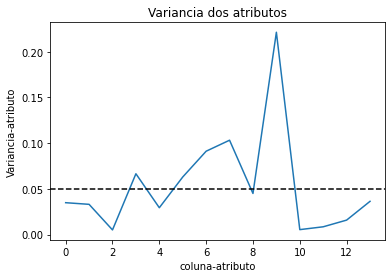

In [74]:
# visualização da variancia de cada coluna
var_col = []

for i in range(X_census_scaler.shape[1]):
    #print(X_census_scaler[i].var())
    var_col.append(X_census_scaler[:, i].var())

plt.plot(var_col)
plt.axhline(y=0.05, color="black", linestyle="--")
plt.title('Variancia dos atributos')
plt.xlabel('coluna-atributo')
plt.ylabel('Variancia-atributo')
plt.show()

In [13]:
# atributos que tem uma variancia muito pequena
# tem a tendencia de serem atributos parecidos
# atributos com a variancia muito pequenas estão muito perto da media

selecao = VarianceThreshold(threshold=0.05)
X_census_variancia = selecao.fit_transform(X_census_scaler)
X_census_variancia.shape

(32561, 5)

In [14]:
X_census_variancia

array([[0.6       , 0.66666667, 0.07142857, 0.2       , 1.        ],
       [0.6       , 0.33333333, 0.28571429, 0.        , 1.        ],
       [0.73333333, 0.        , 0.42857143, 0.2       , 1.        ],
       ...,
       [0.73333333, 1.        , 0.07142857, 0.8       , 0.        ],
       [0.73333333, 0.66666667, 0.07142857, 0.6       , 1.        ],
       [0.73333333, 0.33333333, 0.28571429, 1.        , 0.        ]])

In [15]:
selecao.variances_

array([0.03491381, 0.03312115, 0.00513854, 0.06657104, 0.02941639,
       0.06301762, 0.09123817, 0.10326534, 0.04502805, 0.2213695 ,
       0.0054542 , 0.00855727, 0.01587404, 0.03641266])

In [16]:
# threshold=0.05
# colunas selecionadas

indices = np.where(selecao.variances_ > 0.05)
indices

(array([3, 5, 6, 7, 9], dtype=int64),)

In [17]:
# nome das colunas

colunas[indices]

Index(['education', 'marital-status', 'occupation', 'relationship', 'sex'], dtype='object')

In [18]:
# treinamento com as variaveis selecionadas

In [19]:
# retirando as varivaies que não serão utilizadas

base_census_variancia = base_census.drop(columns = ['age', 'workclass', 'final-weight',
                                                    'education-num', 'race', 'capital-gain',
                                                    'capital-loos', 'hour-per-week', 
                                                    'native-country'], axis = 1)
base_census_variancia

,education,marital-status,occupation,relationship,sex,income
0,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,<=50K
1,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,<=50K
2,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,<=50K
3,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,<=50K
4,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,<=50K
...,...,...,...,...,...,...
32556,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,Female,<=50K
32557,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,Male,>50K
32558,HS-grad,Widowed,Adm-clerical,Unmarried,Female,<=50K
32559,HS-grad,Never-married,Adm-clerical,Own-child,Male,<=50K


In [20]:
# seleção 

X_census_variancia = base_census_variancia.iloc[ :, 0:5].values
y_census_variancia = base_census_variancia.iloc[ :, 5].values

In [21]:
# visualização após tratamento

X_census_variancia

array([[' Bachelors', ' Never-married', ' Adm-clerical',
        ' Not-in-family', ' Male'],
       [' Bachelors', ' Married-civ-spouse', ' Exec-managerial',
        ' Husband', ' Male'],
       [' HS-grad', ' Divorced', ' Handlers-cleaners', ' Not-in-family',
        ' Male'],
       ...,
       [' HS-grad', ' Widowed', ' Adm-clerical', ' Unmarried', ' Female'],
       [' HS-grad', ' Never-married', ' Adm-clerical', ' Own-child',
        ' Male'],
       [' HS-grad', ' Married-civ-spouse', ' Exec-managerial', ' Wife',
        ' Female']], dtype=object)

In [22]:
y_census_variancia

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [23]:
# label encoder
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_sex = LabelEncoder()

X_census_variancia[:,0] = label_encoder_education.fit_transform(X_census_variancia[:,0])
X_census_variancia[:,1] = label_encoder_marital.fit_transform(X_census_variancia[:,1])
X_census_variancia[:,2] = label_encoder_occupation.fit_transform(X_census_variancia[:,2])
X_census_variancia[:,3] = label_encoder_relationship.fit_transform(X_census_variancia[:,3])
X_census_variancia[:,4] = label_encoder_sex.fit_transform(X_census_variancia[:,4])

In [24]:
X_census_variancia

array([[9, 4, 1, 1, 1],
       [9, 2, 4, 0, 1],
       [11, 0, 6, 1, 1],
       ...,
       [11, 6, 1, 4, 0],
       [11, 4, 1, 3, 1],
       [11, 2, 4, 5, 0]], dtype=object)

In [25]:
# oneHotEncoder

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0,1,2,3,4])],remainder='passthrough')
X_census_variancia = onehotencorder.fit_transform(X_census_variancia).toarray()
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [26]:
# normalização

scaler = MinMaxScaler()
X_census_variancia = scaler.fit_transform(X_census_variancia)
X_census_variancia

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [27]:
# treino e teste

X_census_treinamento_var, X_census_teste_var, y_census_treinamento_var, y_census_teste_var = train_test_split(X_census_variancia, y_census_variancia, test_size=0.15, random_state=0)
X_census_treinamento_var.shape, X_census_teste_var.shape

((27676, 46), (4885, 46))

In [ ]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_var = RandomForestClassifier(n_estimators=100,
                                           criterion='entropy',
                                           min_samples_split=5,
                                           min_samples_leaf=1)

# treino
random_forest_var.fit(X_census_treinamento_var, y_census_treinamento_var)

In [29]:
# avaliação

previsoes = random_forest_var.predict(X_census_teste_var)
accuracy_score(y_census_teste_var, previsoes)

0.8169907881269192

[[3388  305]
 [ 589  603]]


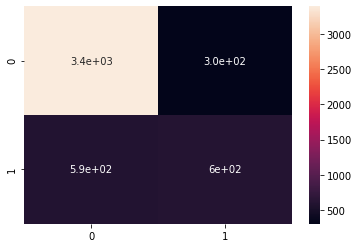

In [30]:
# matriz de confusão

cnn = confusion_matrix(y_census_teste_var, previsoes)
print(cnn)
sns.heatmap(cnn, annot=True);

In [89]:
# avaliação report

print(classification_report(y_census_teste_var, previsoes))

              precision    recall  f1-score   support

       <=50K       0.85      0.92      0.88      3693
        >50K       0.66      0.51      0.57      1192

    accuracy                           0.82      4885
   macro avg       0.76      0.71      0.73      4885
weighted avg       0.81      0.82      0.81      4885



In [76]:
# tamanho da base

X_census_scaler.shape

(32561, 14)

In [77]:
# treinamento com algoritmo Extratreeclassifier

selecao = ExtraTreesClassifier()
selecao.fit(X_census_scaler, y_census)

ExtraTreesClassifier()

In [78]:
# importnacias das colunas com base no algoritmo ExtratreeClassifier

importancias = selecao.feature_importances_
importancias

array([0.15616875, 0.04471086, 0.16321542, 0.03749858, 0.0879479 ,
       0.08106588, 0.07634744, 0.08253048, 0.01414149, 0.02853137,
       0.08910983, 0.02779273, 0.09344036, 0.01749891])

In [79]:
# todas as colunas

colunas

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')

In [81]:
# colunas com a importancia maior que 0.029 

indices = []
for i in range(len(importancias)):
    if importancias[i] >= 0.029:
        indices.append(i)

In [82]:
# indices das colunas

indices

[0, 1, 2, 3, 4, 5, 6, 7, 10, 12]

In [83]:
# colunas selecionadas

colunas[indices]

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'capital-gain',
       'hour-per-week'],
      dtype='object')

In [84]:
# colunas selecionadas

X_census_extra = X_census[:, indices]
X_census_extra

array([[39, 7, 77516, ..., 1, 2174, 40],
       [50, 6, 83311, ..., 0, 0, 13],
       [38, 4, 215646, ..., 1, 0, 40],
       ...,
       [58, 4, 151910, ..., 4, 0, 40],
       [22, 4, 201490, ..., 3, 0, 20],
       [52, 5, 287927, ..., 5, 15024, 40]], dtype=object)

In [86]:
# oneHotencoder

onehotencorder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7])], remainder='passthrough')
X_census_extra = onehotencorder.fit_transform(X_census_extra).toarray()
X_census_extra

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 2.1740e+03,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.3000e+01, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.0000e+00, 1.5024e+04,
        4.0000e+01]])

In [87]:
# tamanho dos dados

X_census_extra.shape

(32561, 58)

In [88]:
# # separação treino e teste

X_census_treinamento_extra, X_census_teste_extra, y_census_treinamento_extra, y_census_teste_extra = train_test_split(X_census_extra, y_census, test_size=0.20, stratify=y_census)
X_census_treinamento_extra.shape, X_census_teste_extra.shape

((26048, 58), (6513, 58))

In [90]:
# uso de algoritmo de classificação
# randomForest

# definindo paramtros
random_forest_extra = RandomForestClassifier(n_estimators=100,
                                           criterion='entropy',
                                           min_samples_split=5,
                                           min_samples_leaf=1)

# treino
random_forest_extra.fit(X_census_treinamento_extra, y_census_treinamento_extra)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [93]:
# avaliação

previsoes = random_forest_extra.predict(X_census_teste_extra)
print(accuracy_score(y_census_teste_extra, previsoes))

0.8506064793489944


[[4552  393]
 [ 580  988]]


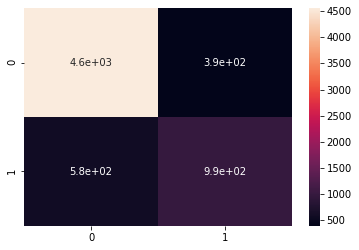

In [94]:
# matriz de confusão

cnn = confusion_matrix(y_census_teste_extra, previsoes)
print(cnn)
sns.heatmap(cnn, annot=True);

In [95]:
# report

print(classification_report(y_census_teste_extra, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4945
        >50K       0.72      0.63      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



##### Avaliação completa model

Acurácia do modelo : 85.06%
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4945
        >50K       0.72      0.63      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513

[[4552  393]
 [ 580  988]]


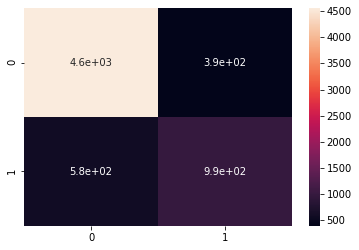

In [107]:
# avaliação completa model

previsoes = random_forest_extra.predict(X_census_teste_extra)

# accuracy
print(f'Acurácia geral do modelo : {accuracy_score(y_census_teste_extra, previsoes)*100:.2f}%')

# heatmap com matriz de confusão
sns.heatmap(cnn, annot=True);
print(classification_report(y_census_teste_extra, previsoes))


# matriz de confusão
cnn = confusion_matrix(y_census_teste_extra, previsoes)
print(cnn)